# Aprendizaje automatico. (ML)
El ML aprende de datos, no como la programacion tradicional que aprende de instrucciones.  En el curso vamos a ver metodos:

1. Supervisados (estas clases)
2. No supervisados (en un mes)
3. Semi-supervisados.
No veremos re-enforzados (reinforcement learning).


## Metodos Supervisados.
Estos metodos requieren "etiquetas" (labels). Mejor dicho datos y respuestas a un modelo. Las respuestas (labels) guian el aprendizaje.

Por ejemplo. A un ninho se le quieren ensenhar animales. Se usa un juego de loteria (cartas) con animales y sus nombres. Se entrena el ninho y luego se le ofrecen cartas sin nombres para que el ninho "adivine". La capacidad de adivinar es la capacidad de aprender. Y solo se sabe que aprendio cuando pasa el "examen".  Palabras dije sin escribir.

Hay ejemplos de aprendizaje interesantes. Yo ilustro uno de ellos que se llama OCR: Optical Character Recognition. El sistema aprende de imagenes.
Por ejemplo
[shapecatcher](https://colab.research.google.com/drive/1SOl20O1rQ_0zyVyCMOeSOAVW8rn20kxg) es capaz de interpretar codigos dibujados "a mano" y aporta el codigo UNICODE.


Parentesis: Que es UNICODE?
La computacion necesita simbolos para operar. Los simbolos originales son las letras y los numeros (arabigos, letras romanas). Se extiende un poco con simbolos como coma, punto y coma, punto, interrogacion, comillas, etc. Para esto en los 60s se desarrollo el sistema

[ASCII](https://es.wikipedia.org/wiki/ASCII). Inicialmente se usaban 7 bits. 128 simbolos. Luego se le introdujo un bit mas. 8 bits da para 256 simbolos.

Se necisitaban muchos mas simbolos para el mundo global y moderno. Se invento el
[UNICODE](https://home.unicode.org/) que usa 32 bits.


In [1]:
2**32

4294967296

La palabra UNICODE viene de codigo
* universal
* unico
* unificado

Otro ejemplo es el
[photomath](https://photomath.com/). Interpreta simbolos, ecuaciones,  problemas escritos a mano, mediante la toma de una foto y conversion a problema matematico en el telefono. Tambien es OCR.

## Aplicaciones:
* Deteccion de fraude en tarjetas de credito
* Analiis de "spam email"
* Autonomous driving (carros autonomos)
* LLM: ChatGPT, Gemini, Llama, etc.
* Dianostico de enfermedades
* etc.

## Temas que se van a cubrir:
* Regresion lineal (esta clase)
* Regresion logistica
* ANN: Artifical Neural Networks (redes neuronales artificiales)
* SVM: Support Vector Machines (maquinas de soporte vectorial).

Existen otros tales como "decision trees" (arboles de decision), "random forests" (bosques aleatorios) pero por falta de tiempo no los veremos en esta clase.

## Regresion Lineal.
El problema de regresion lineal se resume matematicamente en la ecuacion

$$X \theta = y \tag{1} $$
(profe por que no $Ax=b$?) respondo esta pregunta en unos minutos.

$\theta$ es el parametro a aprender en ML. La literatura usa $\theta$ en su gran mayoria, pero a veces usann $w$ (peso: weight).

Por que la ecuacion  (1)?

### Explicando el problema de minimos cuadrados.
Suponga que usted va a vender una casa. Pero no sabe que precio le puede poner.
Que lo es lo que se hace

* Busca una base de datos de precios y caracteristicas de casas vecinas.
Caracteristicas (features): Por ejemplo tamanho, arquitectura, estatro, numero de habitaciones, etc.

* se forma un sistema donde a cada casa con sus parametros se le adjunta el precio. Este sistema, veremos ahora es una regresion lineal. Se calcula el peso $\theta$.

* Con el peso $\theta$, se calcula el valor de su casa.



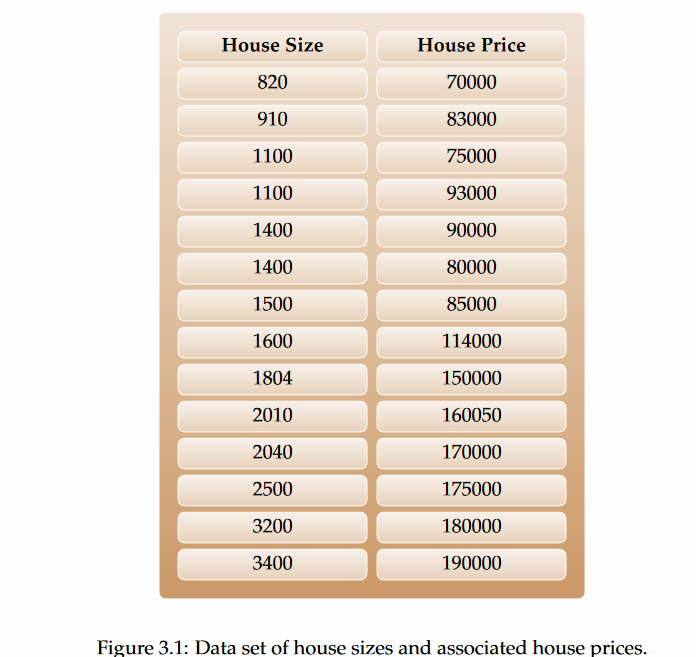

Por simplicidad solo vamos a considerar un solo parametro. Area de la casa.
En la tabla de la Figura 3.1 estan las areas en la primera columna y los precios en la segunda.  Cada parametro es una dimension.

Queremos ajustar este ejemplo a un modelo lineal. Piense que el precio de la casa $i$ es $y_i$, como es lineal necesitamos intercepto $\theta_0$ (a este parametro se le conoce como el **bias**) y pendiente $\theta_1$. El tamanho lo llamos $x_i$. Es decir el modelo **lineal** es
$y_i = \theta_0 + \theta_1 x_i$

Lo que tenemos es

$$y_1 = \theta_0 + \theta_1 x_1 $$
$$y_2 = \theta_0 + \theta_1 x_2 $$
$$ \vdots $$
$$y_m = \theta_0 + \theta_1 x_m $$

Esto lo puede escribir de forma matricial

$$y =X \theta $$
donde
$$y= \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_m \end{pmatrix} $$

$$X= \begin{pmatrix} 1 & x_1 \\ 1 &  x_2 \\ \vdots \\ 1 & x_m \end{pmatrix} $$

$$ \theta = \binom{\theta_0}{\theta_1} $$

Por ejemplo en los datos de la tabla 1

$$y= \begin{pmatrix} 7000 \\ 8300 \\ \vdots \\ 190000 \end{pmatrix} $$

$$X= \begin{pmatrix} 1 & 820 \\ 1 &  1100 \\ \vdots \\ 1 & 3400 \end{pmatrix} $$

$$\theta_0$ es muy importante:

* Todos los unos de la primera columna, siempre estaran ahi, representado a $\theta_0$. Lo veremos en todas partes, en particular en redes neuronales.
* Asumir que $\theta_0=0$ es decir que el modelo siempre pasa por el origen.

Una solucion rapida para la ecuacion (1) es la solucion de minimos cuadrados estudiada en clases anteriores. Recuerde las ecuaciones normales. Multiplique la ecuacion (1) a ambos lados por $X^T$

$$  X^T X \theta = X y $$
Llamamos $A=X^T X$, $b=Xy$ entonces el sistema se puede escribir como

$$A \theta = b $$
$A$ es cuadrada, si tiene inversa

$$\theta = A^{-1} b  $$
Sino, se puede regularizar


$$(A + \lambda I)\theta = b $$
$\lambda > 0$

$$\theta = (A + \lambda I) ^{-1} b  $$

## Interpretacion del problema de regresion como minimos cuadrados.

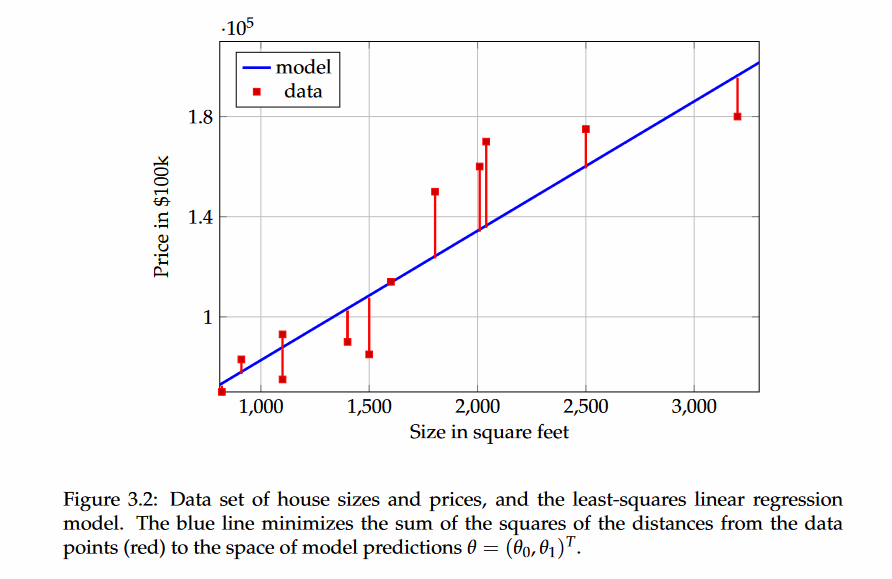

Definimos la **hipotesis** como el resultado que quisieramos tener
$h(\theta, x_i) = x_i^T \theta=\langle x, \theta \rangle $ donde $x_i$ es un vector en $\mathbb{R}^n$ ($n$ es el numero de caracteristicas (features)
Queremos que el precio $y_i$ se acerque a la hipteis tanto como sea posible.
En la grafica 3.2 queremos reducir el tamanho de las barras rojas. La hipotesis es lineal (en este caso la linea azul). Los datos son los puntos rojos $y_i$.

Para reducir la distancia (longitud) de los puntor rojos a la hipotesis, debemos reducir

$$\sum_{i=1}^m (y_i - x_i^T \theta)^2 = \| X \theta - y \|^2 $$

## Metodo del gradiente.
El problema de regresion lineal se puede resolver analiticamente con las ecuaciones normales. Pero para ML las matrices pueden ser inmensamente grandes. Entonces invertir matrices a este nivel se vuelve muy costoso. El metodo el gradiente es iterativo y rapido para matrices grandes y "sparse matrices" dispersas.
En el metodo del gradiente no hay que almacenar estas matrices grandes.

Por el momento vamos a pensar en metodos para resolver $A\theta = b$.

Existen dos metodos. Directos Iterativos

1. Directos
    *  Eliminacion Gaussiana, Descomposicion Cholesky, Descomposicion QR, Cramer.

2. Iterativos
    *  Estacionarios: Metodos que se basan en la descomposicon de una matriz en $A=L+D+U$. Por ejemplo Gauss-Seidel, Jacobi, Over-relaxation (tema de Metodos Numericos). Que aca la matriz $A$ es estatica.
    *  No estacionarios: La matriz $A$ esta implicada no es estatica. Metodos de gradiente. SD=Steepest Descent (maximo descenso), CG=Conjuage Gradient.

La Figura 3.4. ilustra esto.

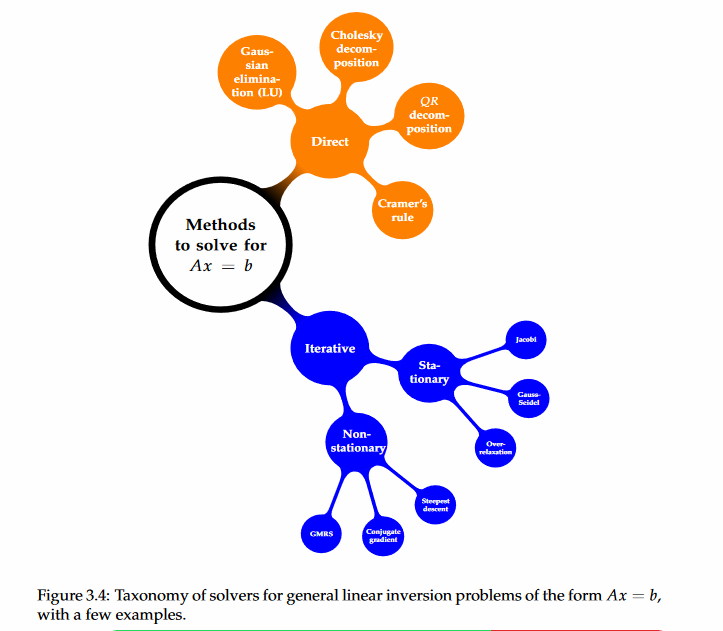

Esto que vimos es para resolver problemas lineales $A \theta = b$. Pero queremos resolver problemas no lineales tambien. Por ejemplo encontrar el minimo en la [Ackley function](https://www.sfu.ca/~ssurjano/ackley.html).
Como podemos hacer esto?

El problema de regresion lineal se puede resolver de dos formas

$$A \theta = b $$
done $A=X^T X$, $b=X^T y$ son las ecuaciones normales.
Pero tambien se puede resolver minimizando la funcion de costo (minimos cuadrados)

$$J(\theta) = \frac12 \|  A \theta - b \|^2 $$

Existen otras tecnicas que mencionamos aca:

* [Simulating Annealing](https://en.wikipedia.org/wiki/Simulated_annealing). Es bueno para encontrar un minimo global. Pero es lento. Puede crear "overfitting" (el concepto de "overfitting" lo estudiamos mas adelante). No requiere derivadas.

* [Pattern Search](https://en.wikipedia.org/wiki/Pattern_search_(optimization))
No requiere derivadas.  Algunas veces se usa en ANN.

* [Particle Swarm Optimization (enjambre de particulas)](https://en.wikipedia.org/wiki/Pattern_search_(optimization)). Tampoco requiere derivada.

Las siguientes tecnicas son basadas en el gradiente.

* Metodos de Newton: Se basan en la expansion de Taylor de segundo orden donde entra la matriz Hessiana (matriz de segundas derivadas parciales). Son robustos pero la matriz Hessiana es muy costosa de calcular y almacenar. Si el gradiente tiene 1000 componentes la matriz Hessiana tiene 1 millon.  Existen tecnicas para simplificar este problema como las que menciono enseguida.

* Quasi-Newton methods. Estas tecnicas reducen el tamanho de las matrices Hessianas, pensando en que lo importante de la matriz esta en la diagonal.
Por ejemplo el L-BFGS (se usa en la tarea). Limited memory: Broyden-Fletcher-Goldfarb-Shanno.
Podria interesarle [aproximacion en series  deTaylor en varias variables](https://en.wikipedia.org/wiki/Taylor_series).

* Otros metodos de descenso de gradiente:
    * De acuerdo a como use los datos
        * Batch Gradient Descent BGD: Se usan **todos** los datos.
        * MiniBatch Gradient Descent MGD : Se usan **montoncitos**.  
        * Stochastic Gradient Descent SGD: Se usa solo un dato pero escogido aleatoriamente.

    * De acuerdo a la forma de descenso:
        * Steepest Descent (SD), lo explico enseguida. Sigue el gradiente al pie de la letra.  Produce zig-zageo.
        * Conjugate Gradient. Directo al grano. Pero es util para problemas lineales.
        * Non-linear conjugate gradient. Trata de resolver el problema como el paso anterior pero con trucos para que sea extendible a problemas no lineales. Ejemplo L-BFGS, mencionado arriba.
        

Recordemos algunas cosas del problema de minimos cuadrados.
Queremos minimizar la funcion de costo (target, loss (perdida), objetive)

$$J = \frac12 \| X \theta - y \|^2  = \frac12 \| h(\theta, x) - y\|^2 = \frac12 \sum_{i=1}^m ( h(\theta, x^{(i)}) - y_i )^2 $$

Tomando derivadas (capitulo anterior)

$$\nabla_k J(\theta)=  \frac{\partial J}{\partial \theta_k} =
\sum_{i=1}^m  (h(\theta, x^{(i)}) - y_i) x_{ik}  $$

### Revision del metodo de Steepest Descent. (maximo descenso).
Recordando un poco el calculo en varias variable, la direccion del gradiente es la direccion de maximo ascenso. Veamos por que
La **derivada direccional** de $J$ con respecto a la direccion $u$ esta dada por

$$ \frac{\partial J}{\partial u} = \nabla J \cdot u $$
La direccion de maximo ascenso es la del gradiente por que este producto punto es


$$  \left |  \frac{\partial J}{\partial u} \right |  = \| \nabla J  \| \| u \| \cos \theta = \| \nabla J \| \cos \theta $$
El maximo valor que esto pueda tener es cuando $\theta=0,  \pi$.
Cuando es $0$ es maximo ascenso, cuando es $\pi$ maximo descenso.
entonces la direccion de maximo descenso es

$$u = -\frac{\nabla J(\theta)}{\| \nabla J(\theta) \|} $$

Como vamos a descender de donde estamos hacia el centro del valle.
La clave esta en la formula recursiva

$$\theta^{(i)} = \theta^{(i-1)} - \alpha \nabla J(\theta^{(i-1)}) $$
El primer $\theta^{(0)}$ se escoge de forma aleatoria.
El comienzo es simple (aleatorio), el gradiente se puede obtener de forma analitica o numerica (en la practica es numerica). Pero quien es $\alpha$?
$\alpha$ es un **hiperparametro**. Hiperparametro es cualquier parametro que no sea $\theta$. Por que es importante:

* Un alpha muy pequenho puede hacer que la convergencia sea muy lenta.
* Un alpha muy grande puede hacer que el sitema diverja.



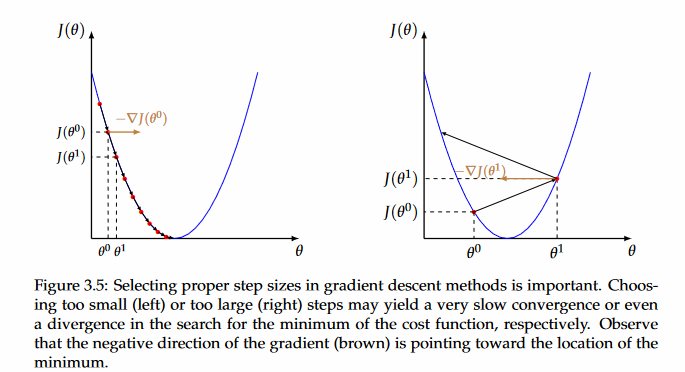

En la funcion de costo de arriba tenemos que

$$\nabla J(\theta) = X^T ( X \theta - y)  $$

Aparecen las siguientes preguntas:
1. El gradiente apunta al minimo?
2. Que tanto vamos a iterar antes de parar?

Veamos la Figura 3.6 que ilustra el caminio en una funcion de costo cuadratica del tipo $J$ de arriba.

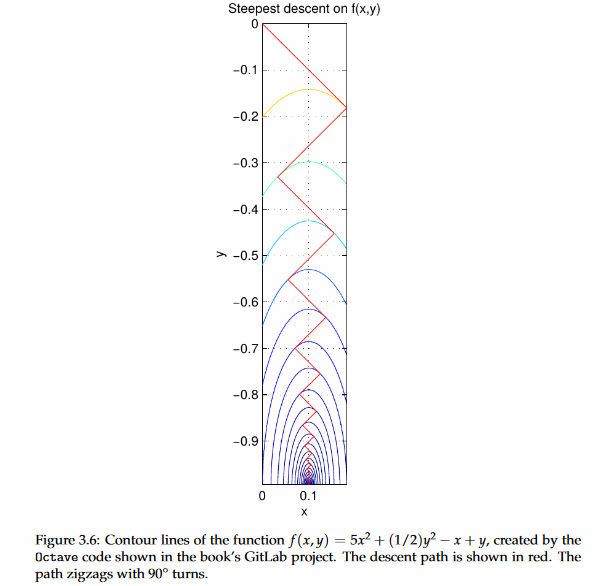

## Linea de busqueda en Steepest Descent (SD).
Recuerde las ecuaciones normales

$$X^T X \theta = X^T y $$
Llamemos $A=X^T X$, b=X^T y$
de forma que encontramos que

$$\nabla J(\theta) = A \theta - b. \tag{3} $$
Vimos un ejercicio donde si $z=\frac12 \theta^T A \theta - b^T \theta + c$ entonces
$\nabla z = A \theta - b $.

Pregunta (Juan Jose). Que valor debe tener $\alpha$? Si estamos resolviendo el metodo de minimos cuadrados (regresion lineal) si se puede hallar el $\alpha$ optimo. En la practica esto es imposible.

Podemos definir una funcion auxiliar

$$\varphi(\alpha) = J[ \theta_0 - \alpha \nabla J(\theta_0)] $$
La idea para encontrar el $\alpha$ optimo es derivar e igualar a 0 y resolver la ecuacion. Usando la regla de la cadena.

$$\varphi'(\alpha) = \nabla J[ \theta_0 - \alpha \nabla J(\theta_0)] \cdot \nabla J(\theta_0) = 0 $$

Definamos

$$\theta_1 = \theta_0 - \alpha \nabla J(\theta_0) \tag{4} $$
Recuerde la ecuacion (3) y de la ecuacion (4)

$$A \theta_1 - b = A \theta_0 - b - \alpha A \nabla J(\theta_0) \tag{5} $$
Definamos ahora los residuales

$$r_0 = A \theta_0 -b = \nabla J(\theta_0) $$
$$r_1 = A \theta_1 -b = \nabla J(\theta_1) $$
podemos reescribir la ecuacion (5) como

$$r_1= A \theta_1 - b = A (\theta_0 - \alpha \nabla J(\theta_0)) - b = A \theta_0 -b - A \alpha \nabla J(\theta_0) = r_0 - \alpha A \nabla J(\theta_0) $$

Reescribiendo

$$r_1= r_0 - \alpha A \nabla J(\theta_0) $$

Recuerde que $r_0 \cdot r_1 = 0$.
Entonces premultiplicamos por $r_0^T$ a ambos lados de esta ecuacion. Para despejar $\alpha$

$$r_0^T r_1= r_0^T r_0  - \alpha A r_0^T \nabla J(\theta_0) $$
$$0 = \| r_0 \|^2  - \alpha A r_0^T \nabla J(\theta_0) $$

$$0 = \| r_0 \|^2  - \alpha  r_0^T A  r_0 $$

Despejamos $\alpha$

$$\alpha = \frac{\| r_0 \|^2}{ r_0^T A r_0} $$

Este es el $\alpha$ optimo analitico.

En la proxima clase mostramos el algoritmo de SD y ejemplos numericos.

